# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/dog_images/train')
valid_files, valid_targets = load_dataset('data/dog_images/valid')
test_files, test_targets = load_dataset('data/dog_images/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Data visualization

A few data visualization plots were made to get a quick overview of the data being used for this project!

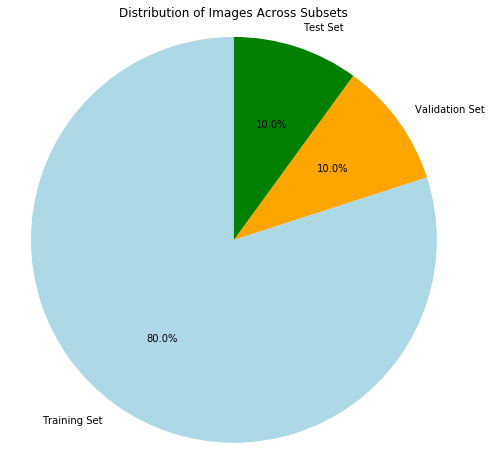

In [4]:
# Calculate the distribution of images across the different subsets of the dataset
total_images = len(train_files) + len(valid_files) + len(test_files)
train_pct = len(train_files) / total_images * 100
valid_pct = len(valid_files) / total_images * 100
test_pct = len(test_files) / total_images * 100

# Create a pie chart to visualize the distribution of images across subsets
labels = ['Training Set', 'Validation Set', 'Test Set']
sizes = [train_pct, valid_pct, test_pct]
colors = ['lightblue', 'orange', 'green']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Images Across Subsets')
plt.axis('equal')
plt.show()

> In the above plot it can be observed the distribution used for the data, where 80% is training and 10% for validation and test sets

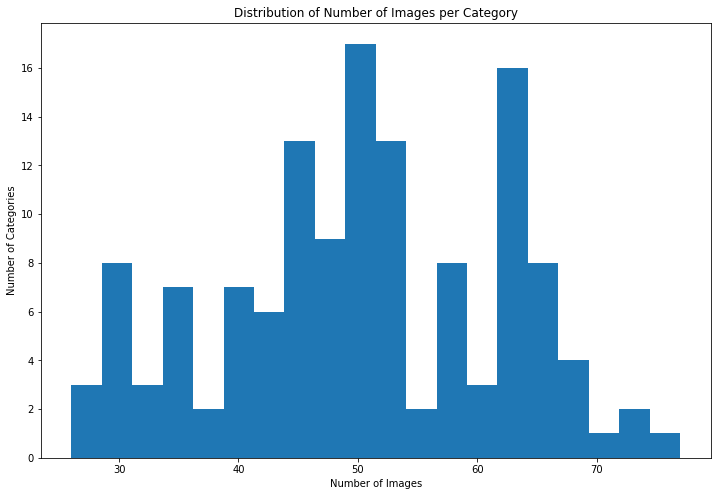

In [15]:
# calculate the number of images per category
num_images_per_category = np.sum(train_targets, axis=0)

# visualize the distribution of number of images per category using a histogram
plt.figure(figsize=(12,8))
plt.hist(num_images_per_category, bins=20)
plt.xlabel('Number of Images')
plt.ylabel('Number of Categories')
plt.title('Distribution of Number of Images per Category')
plt.show()

> The above code shows the distribution of images per category, in which it can be observed how many images are in how many categories. This can give an insight on how well the data is distributed, where the approximate mean of all categories would be of 50 images.

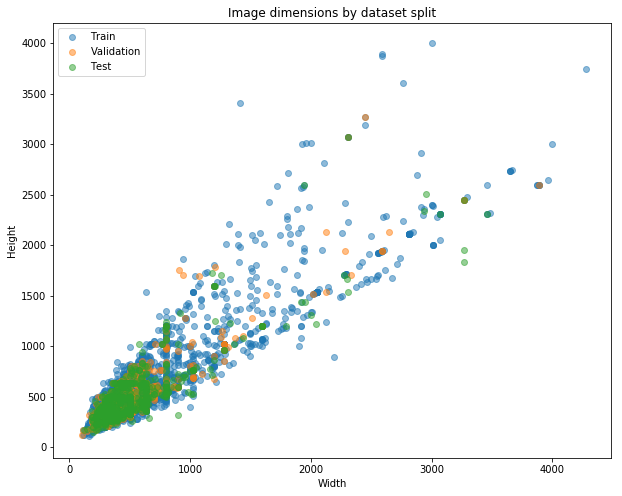

In [12]:
from PIL import Image

# create scatter plot of image dimensions
def get_image_size(file_path):
    with Image.open(file_path) as img:
        return img.size

train_sizes = np.array([get_image_size(file) for file in train_files])
valid_sizes = np.array([get_image_size(file) for file in valid_files])
test_sizes = np.array([get_image_size(file) for file in test_files])

plt.figure(figsize=(10, 8))
plt.scatter(train_sizes[:, 0], train_sizes[:, 1], alpha=0.5, label='Train')
plt.scatter(valid_sizes[:, 0], valid_sizes[:, 1], alpha=0.5, label='Validation')
plt.scatter(test_sizes[:, 0], test_sizes[:, 1], alpha=0.5, label='Test')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image dimensions by dataset split')
plt.legend()
plt.show()

> Fromt the above plot it can be observed the distribution of image sized through a scatterplot where it shows how most of the images from all three datasets are around 200 to 1000 pixels squared. Additionally, it can be observed how the train dataset is the one that have more images with high resolutions, which makes complete sense as it holds 80% of the data.

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


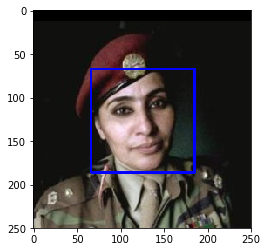

In [4]:
import cv2                
import matplotlib.pyplot as plt   
import time
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    '''
    This function makes use of the cv2 Cascade Classifier to analyze if any frontal face is detected in the img
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (boolean) True or False depending if a face was detected 
    
    '''
    
    # image loading with path provided
    img = cv2.imread(img_path)
    
    # changing image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # face detection with cascade classifier
    faces = face_cascade.detectMultiScale(gray)
    
    # result of the face detection
    result = len(faces) > 0
    
    return result

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

In [6]:
# subset to be anlalyzed
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

# testing the performance of the face_detector algorithm 
# on the images in human_files_short and dog_files_short.

# Initilizations of empty arrays that will store if face was found in the image
human_face_detected = []
dog_face_detected = []

# loop to iterate through each image in both datasets
for human_img, dog_img in zip(human_files_short,dog_files_short):
    
    # add True if face is recognized, else False
    human_face_detected.append(face_detector(human_img)) 
    dog_face_detected.append(face_detector(dog_img))

In [7]:
# check percentages of detection of each dataset
human_percentage = human_face_detected.count(True)/len(human_files_short)*100
dog_percentage = dog_face_detected.count(True)/len(dog_files_short)*100

# display results
print('Face percentage in human dataset: {}%\n'.format(human_percentage))
print('Face percentage in dog dataset: {}%'.format(dog_percentage))

Face percentage in human dataset: 100.0%

Face percentage in dog dataset: 11.0%


__Answer:__ 

> It can be observed how we got 100% detection in the human dataset as expected, while we got a (not that much expected) 11% in dog dataset, which ideally should be 0% 

__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

#### As the results were not the expected in the inital testing of the Cascade Classifier we will be using several Cascade Classifiers for face detection using opencv


**Pros and cons of this approach are discussed below**

### OpenCV Cascade Classfiers

For the development of this approach, several cascade classifiers will be used to generate the face detection tom attempt to get better accuracy when testing. Pros and cons of this implementations are described next:

**Pros:**
* Simple lightweight solution for face detection
* Fast performance
* Easy implementation

**Cons:**
* Lower accuracy than more advanced technoques like RetinaFace
* Limited to detecting faces only, without additional facial landmark information
* Can have difficulty with complex scenes

Now let's get to the code! We will be using the same function used above, but changing the definition of the classificator by using all that have frontal face recognition.

In [8]:
# extract pre-trained face detector with several clasificators
face_cascades = [
    cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml'),
    cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml'),
    cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml'),
    cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt_tree.xml')
]

# same subset dataset defined above is used for analysis

# initilizations of empty arrays that will store if face was found in the image
human_face_detected = []
dog_face_detected = []

# loop to iterate through each image in both datasets
start_time = time.time() # start timer
for human_img, dog_img in zip(human_files_short,dog_files_short):
    
    # add True if face is recognized, else False
    human_face_detected.append(face_detector(human_img))
    dog_face_detected.append(face_detector(dog_img))

end_time = time.time() # end timer

# get elapsed time
elapsed_time = end_time - start_time

In [9]:
# check percentages of detection of each dataset
human_percentage = human_face_detected.count(True)/len(human_files_short)*100
dog_percentage = dog_face_detected.count(True)/len(dog_files_short)*100

# display results
print('Face percentage in human dataset: {}%\n'.format(human_percentage))
print('Face percentage in dog dataset: {}%\n'.format(dog_percentage))
print('Elapsed time for this implementation was of {:.3f} seconds'.format(elapsed_time))

Face percentage in human dataset: 100.0%

Face percentage in dog dataset: 11.0%

Elapsed time for this implementation was of 18.354 seconds


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [10]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [11]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    '''
    This function takes the file path to an image and converts it to a 4D tensor 
        that can be used as input to a neural network    
        
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (Numpy Array, dtype:float32) 4D tensor with shape (1, 224, 224, 3)
    
    '''
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    '''
    This function takes the several file paths to an image and converts it to a 4D tensor 
        that can be used as input to a neural network    
        
    INPUT:
    img_path - (array) path to the images to be analyzed
    
    OUTPUT:
    result - (Numpy Array, dtype:float32) 4D tensors with shape (1, 224, 224, 3)
    
    '''
    
    # convert images to 4D tensors and put those into a list
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [12]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    '''
    This function takes a file path to an image and make a prediction of the dog breed 
        
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (integer) predicted label of the breed
    
    '''
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
def dog_detector(img_path):
    '''
    This function checks if the predicted label is within the dog breed labels which is from 151 to 268 
        
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (boolean) returns boolean depending on the predicted label value
    
    '''
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [17]:
# same subset dataset defined above is used for analysis

# initilizations of empty arrays that will store if face was found in the image
human_face_detected = []
dog_face_detected = []

# loop to iterate through each image in both datasets
start_time = time.time() # start timer
for human_img, dog_img in zip(human_files_short,dog_files_short):
    
    # add True if face is recognized, else False
    human_face_detected.append(dog_detector(human_img))
    dog_face_detected.append(dog_detector(dog_img))

end_time = time.time() # end timer

# get elapsed time
elapsed_time = end_time - start_time

In [18]:
# check percentages of detection of each dataset
human_percentage = human_face_detected.count(True)/len(human_files_short)*100
dog_percentage = dog_face_detected.count(True)/len(dog_files_short)*100

# display results
print('Dog percentage in human dataset: {}%\n'.format(human_percentage))
print('Dog percentage in dog dataset: {}%\n'.format(dog_percentage))
print('Elapsed time for this implementation was of {:.3f} seconds'.format(elapsed_time))

Dog percentage in human dataset: 0.0%

Dog percentage in dog dataset: 100.0%

Elapsed time for this implementation was of 9.787 seconds


__Answer:__ 

> From the results shown, it can be observed how the result was ideal as we got 100% acuracy in the dog dataset and 0% from the human dataset while also keeping the classification on 10 seconds wit GPU enabled

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [15]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 101.84it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

### Network architecture decision

A architecture really similar to the one proposed in the above figure was used. Nevertheless, it was observed that the function loss value was really high and at some points it was increasing which might be sign of overfitting in the model. 

Then I decided to go straightforward for a much more complex CNN (even when I should have started simpler, just went all in!) with the characteristics described next:

* Several double convolutional layers with the same amount of filters and kernels to extract as much low-features as posible from the training
* The convolutional layers used padding to have the same dimentions in the output and used a ReLU activation function to add non-linearity to the network for it to learn complex patterns
* Each convolutional layer was followed by a BatchNormalization layer, which normalized the activations from the previous layer as a mean to improve the training speed and reduce overfitting
* After each set of two convolutional layers with its own BatchNormalization a layer of MaxPooling that reduces dimensions of the feature maps by half and also helps control overfitting and reduce computation
* Then a flatten layer is used to create a one-dimensional tensor to be used as input for the dense layers
* Then the dense layers are set with 512 and 256 neurons to get the high-level features. Each dense layer are also bound to a BatchNormalization and a Dropout layer to drop randomly 50% of the neurons reducing overfitting
* Finally a dense layer with 133 neurons (dog breed classifications) with a softmax activation function that transform the outputs into probabilities that sum 1, which is suitable for multi-class clasification

As the first model described above was very complex. I decided to test a second model with the same structure but using a single convolutional layer instead of a pair. The models are defined as model and model2 respectively in the code. 

In [16]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
import keras

# input shape of the neural network architecture
input_shape=(224, 224, 3)

# number of outputs to be clasified
num_classes=133

model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),

        # Convolutional Layer 2
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 1
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 3
        Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Convolutional Layer 4
        Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 2
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 5
        Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Convolutional Layer 6
        Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 3
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 7
        Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Convolutional Layer 8
        Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 4
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten Layer
        Flatten(),

        # Fully Connected (Dense) Layer 1
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Fully Connected (Dense) Layer 2
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 112, 112, 64)      256       
__________

### Simpler neural network model with less layers

In [17]:
model2 = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),

        # Max-Pooling Layer 1
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 3
        Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 2
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 5
        Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 3
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 7
        Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),

        # Max-Pooling Layer 4
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten Layer
        Flatten(),

        # Fully Connected (Dense) Layer 1
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Fully Connected (Dense) Layer 2
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 128)       73856     
__________

### Compile the Model

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [42]:
from keras.callbacks import ModelCheckpoint  

# number of epochs that you would like to use to train the model
epochs = 5

# checkpointer to save the most accurate possible model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# fitting the model with training data
model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
6680/6680 [==============================] - 232s 35ms/step - loss: 5.4651 - acc: 0.0181 - val_loss: 5.2845 - val_acc: 0.0156
Epoch 2/5
6680/6680 [==============================] - 229s 34ms/step - loss: 4.8336 - acc: 0.0373 - val_loss: 4.9412 - val_acc: 0.0383
Epoch 3/5
6680/6680 [==============================] - 229s 34ms/step - loss: 4.5029 - acc: 0.0528 - val_loss: 4.2632 - val_acc: 0.0766
Epoch 4/5
6680/6680 [==============================] - 229s 34ms/step - loss: 4.2660 - acc: 0.0689 - val_loss: 4.4342 - val_acc: 0.0647
Epoch 5/5
6680/6680 [==============================] - 229s 34ms/step - loss: 4.0580 - acc: 0.0861 - val_loss: 5.4163 - val_acc: 0.0156


In [49]:
from keras.callbacks import ModelCheckpoint  

# number of epochs that you would like to use to train the model
epochs = 5

# checkpointer to save the most accurate possible model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5_2', 
                               verbose=1, save_best_only=True)

# fitting the model with training data
model2.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
6680/6680 [==============================] - 109s 16ms/step - loss: 5.4570 - acc: 0.0162 - val_loss: 5.1348 - val_acc: 0.0144
Epoch 2/5
6680/6680 [==============================] - 106s 16ms/step - loss: 4.7980 - acc: 0.0367 - val_loss: 4.5004 - val_acc: 0.0371
Epoch 3/5
6680/6680 [==============================] - 105s 16ms/step - loss: 4.5088 - acc: 0.0527 - val_loss: 4.5560 - val_acc: 0.0431
Epoch 4/5
6680/6680 [==============================] - 105s 16ms/step - loss: 4.2683 - acc: 0.0614 - val_loss: 4.5075 - val_acc: 0.0647
Epoch 5/5
6680/6680 [==============================] - 106s 16ms/step - loss: 4.0370 - acc: 0.0903 - val_loss: 4.3331 - val_acc: 0.0802


### Load the Model with the Best Validation Loss

In [20]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [21]:
model2.load_weights('saved_models/weights.best.from_scratch.hdf5_2')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [44]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 6.5789%


In [24]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model2.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 7.7751%


> From the above it can be observed how the simpler CNN got better accuracy results than the more complex one. Hence, the second model will be used for further training

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [22]:
from keras.callbacks import ModelCheckpoint

bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [23]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [24]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [76]:
# checkpointer to save the most accurate possible model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

# fitting the model with training data
VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 373us/step - loss: 12.0503 - acc: 0.1213 - val_loss: 10.4575 - val_acc: 0.2084
Epoch 2/20
6680/6680 [==============================] - 2s 259us/step - loss: 9.6651 - acc: 0.2951 - val_loss: 9.6859 - val_acc: 0.2994
Epoch 3/20
6680/6680 [==============================] - 2s 259us/step - loss: 9.1839 - acc: 0.3651 - val_loss: 9.5742 - val_acc: 0.3102
Epoch 4/20
6680/6680 [==============================] - 2s 259us/step - loss: 8.9579 - acc: 0.3979 - val_loss: 9.3374 - val_acc: 0.3389
Epoch 5/20
6680/6680 [==============================] - 2s 260us/step - loss: 8.8267 - acc: 0.4208 - val_loss: 9.3291 - val_acc: 0.3437
Epoch 6/20
6680/6680 [==============================] - 2s 259us/step - loss: 8.7262 - acc: 0.4314 - val_loss: 9.1239 - val_acc: 0.3617
Epoch 7/20
6680/6680 [==============================] - 2s 258us/step - loss: 8.5662 - acc: 0.4421 - val_loss: 9.0457 - val_acc: 0.3677

### Load the Model with the Best Validation Loss

In [25]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [26]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 42.1053%


### Predict Dog Breed with the Model

In [27]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    '''
    This function obatains the predicted dog breed based of the image provided
        
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (str) name of the predicted breed out of the dog_names list
    
    '''
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']
    
As we want can't upload big files in the jupyter environment enhanced with GPU, the VGG19 model will be used for the means of this project!

In [28]:
# Obtain bottleneck features from  pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogVGG19Data.npz')
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

> The architecture proposed uses two additional dense layers to extract high-level features where both ot them have the BatchNormalization and Dropouts of 50% to avoid overfitting in the model. A little analysis on the results obtained during traiing is provided below :)

In [29]:
# Definition of the final model using VGG19 pretrained network for transfer learning
final_model = Sequential([
    
        # Input layer for pretrained network
        GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]),

        # Fully Connected (Dense) Layer 1
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Fully Connected (Dense) Layer 2
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer
        Dense(133, activation='softmax')
    ])

final_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
__________

### (IMPLEMENTATION) Compile the Model

In [30]:
# Compile the model
final_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [39]:
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

final_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 4s 617us/step - loss: 3.4625 - acc: 0.2487 - val_loss: 1.7060 - val_acc: 0.6132
Epoch 2/20
6680/6680 [==============================] - 3s 447us/step - loss: 2.0709 - acc: 0.4925 - val_loss: 1.3039 - val_acc: 0.6946
Epoch 3/20
6680/6680 [==============================] - 3s 446us/step - loss: 1.6588 - acc: 0.5936 - val_loss: 1.1533 - val_acc: 0.7030
Epoch 4/20
6680/6680 [==============================] - 3s 447us/step - loss: 1.4253 - acc: 0.6440 - val_loss: 1.0066 - val_acc: 0.7437
Epoch 5/20
6680/6680 [==============================] - 3s 451us/step - loss: 1.2760 - acc: 0.6834 - val_loss: 0.9485 - val_acc: 0.7485
Epoch 6/20
6680/6680 [==============================] - 3s 446us/step - loss: 1.1802 - acc: 0.6994 - val_loss: 0.9085 - val_acc: 0.7665
Epoch 7/20
6680/6680 [==============================] - 3s 445us/step - loss: 1.0888 - acc: 0.7310 - val_loss: 0.8443 - val_acc: 0.7820
E

> From the above training it can be observed how the loss function and validation loss function values both decrease and have really close values between each other indicating that the model is generalizung well for validation data. 

> This is a good indication that the model is not overfitting nor underfitting and is learning the underlying patterns in the data.

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [31]:
# Load the model weights with the best validation loss
final_model.load_weights('saved_models/weights.best.VGG19.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [42]:
# calculate classification accuracy on the test dataset

# get index of predicted dog breed for each image in test set
final_predictions = [np.argmax(final_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(final_predictions)==np.argmax(test_targets, axis=1))/len(final_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.5455%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [3]:
from extract_bottleneck_features import *

# Function that takes a path to an image as input
def final_model_predict(img_path):
    
    '''
    This function predict the dog breed using the complete model architecture that used transfer learning
    
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (str) dog breed predicted 
    
    '''
    
    # extract bottleneck features
    bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = final_model.predict(bottleneck_feature)
    
    print(predicted_vector)
    print(dog_names)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [5]:
from IPython.core.display import Image, display

def breed_algorithm(img_path):
    
    '''
    This function predict the dog breed if a dog or face is detected. 
        If any of those is detected it prints out a message
    
    INPUT:
    img_path - (str) path to the image to be analyzed
    
    OUTPUT:
    result - (str) dog breed predicted 
    
    '''
    
    # Pixels for image to be displayed in the code
    pixels = 200
    
    # displaying the image
    display(Image(img_path, width=pixels, height=pixels))
    
    # if dog is detected
    if dog_detector(img_path) == True:
        print("This image is predicted to be a dog, and its breed is: \n")
        prediction = final_model_predict(img_path)
        prediction = prediction[prediction.find('.')+1:]
        return prediction
    
    # if face is detected
    elif face_detector(img_path) == True:
        print("This image is predicted to be a human, and its spirit animal is a: \n")
        prediction = final_model_predict(img_path)
        prediction = prediction[prediction.find('.')+1:]
        return prediction
    
    # if neither is detected
    else:
        return print("It wasn't possible to identify neither a human face nor a dog in the image \n")

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

> For the means of this analysis, it was used a set of 3 breeds that are really easy to identify, then a setof 3 breeds that might be confusing even for a human, then a set of 3 human faces to finally use a set of 3 weird images of fictional characters.

### Set of easy recognizable breeds

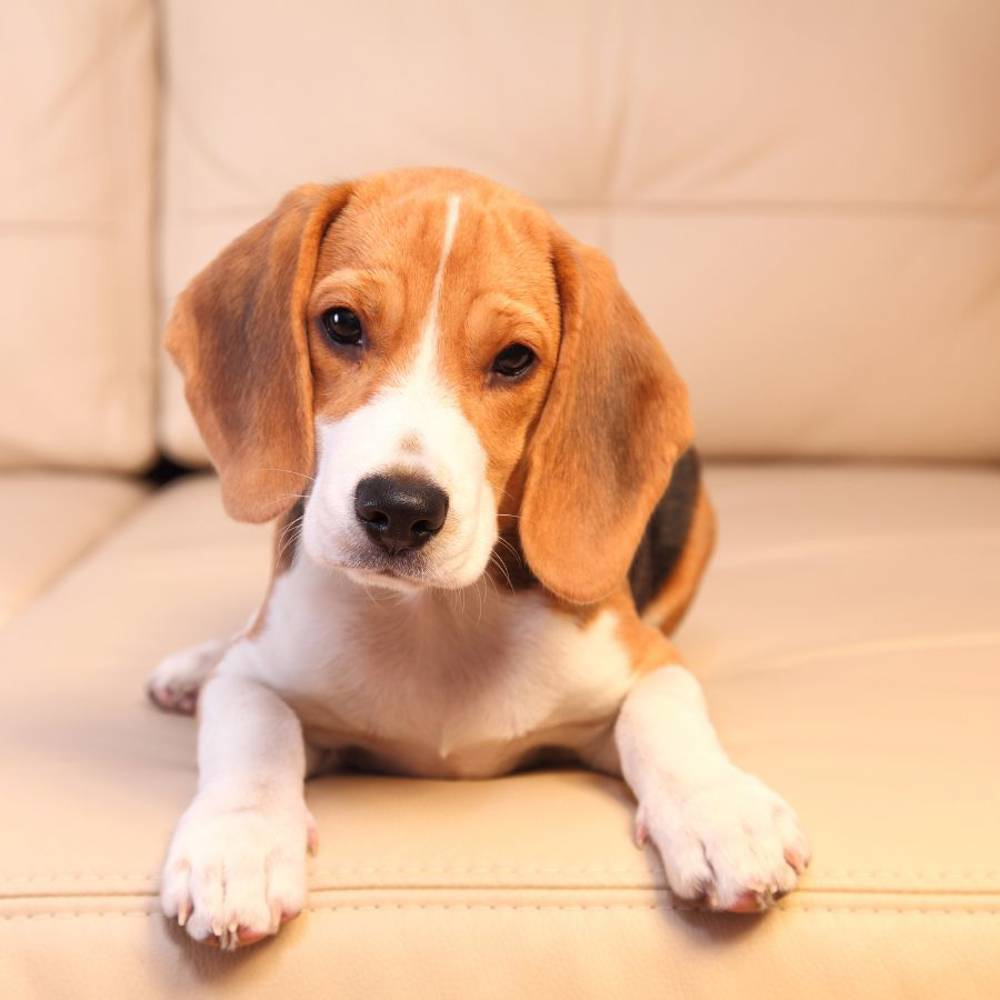

NameError: name 'dog_detector' is not defined

In [6]:
print(breed_algorithm('test_images/beagle.jpg'))

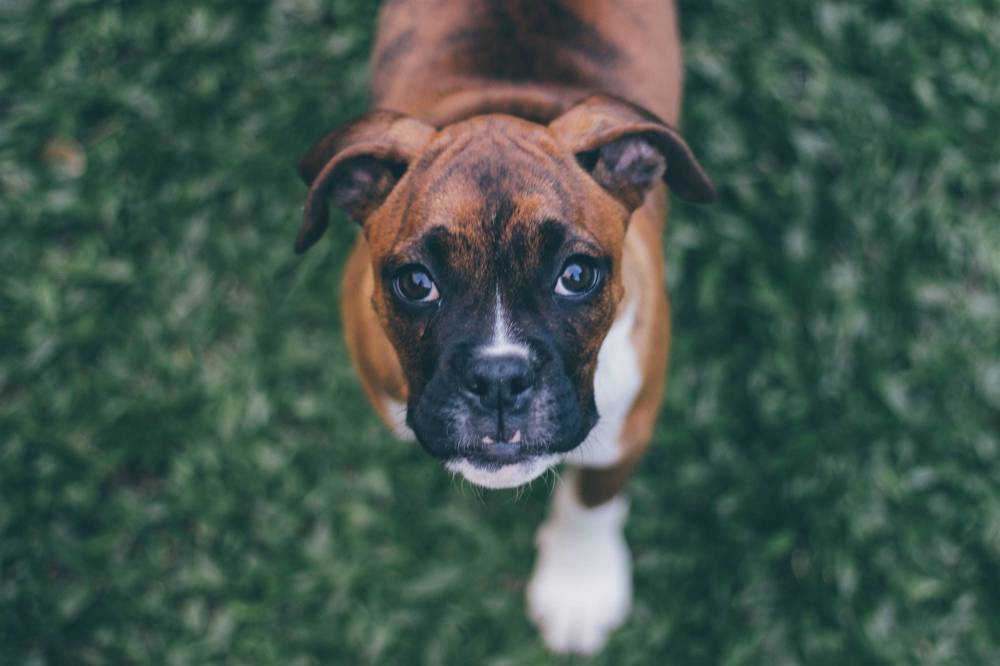

This image is predicted to be a dog, and its breed is: 

Boxer


In [36]:
print(breed_algorithm('test_images/boxer.jpg'))

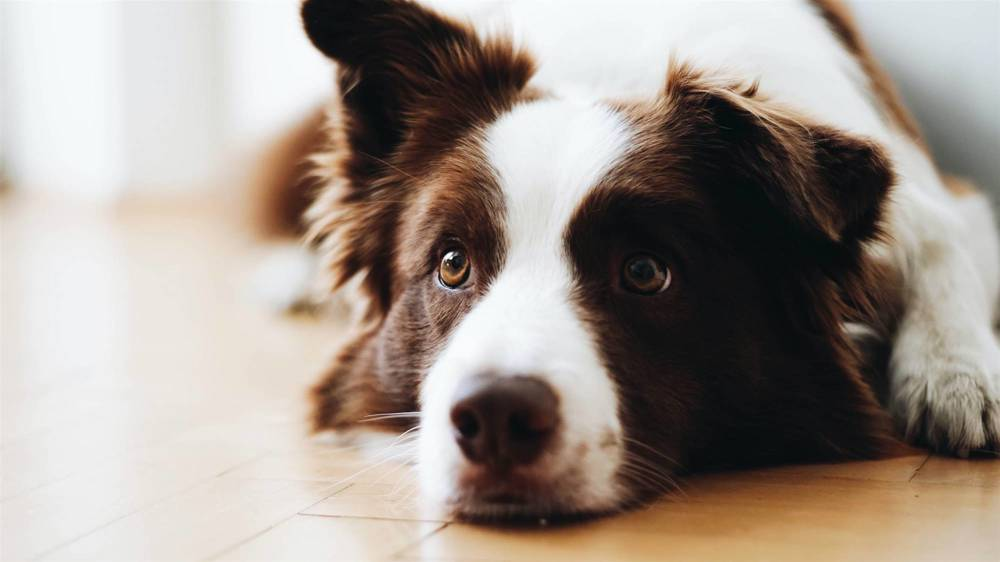

This image is predicted to be a dog, and its breed is: 

Border_collie


In [38]:
print(breed_algorithm('test_images/border_collie.jpg'))

### Set of hard recognizable breeds

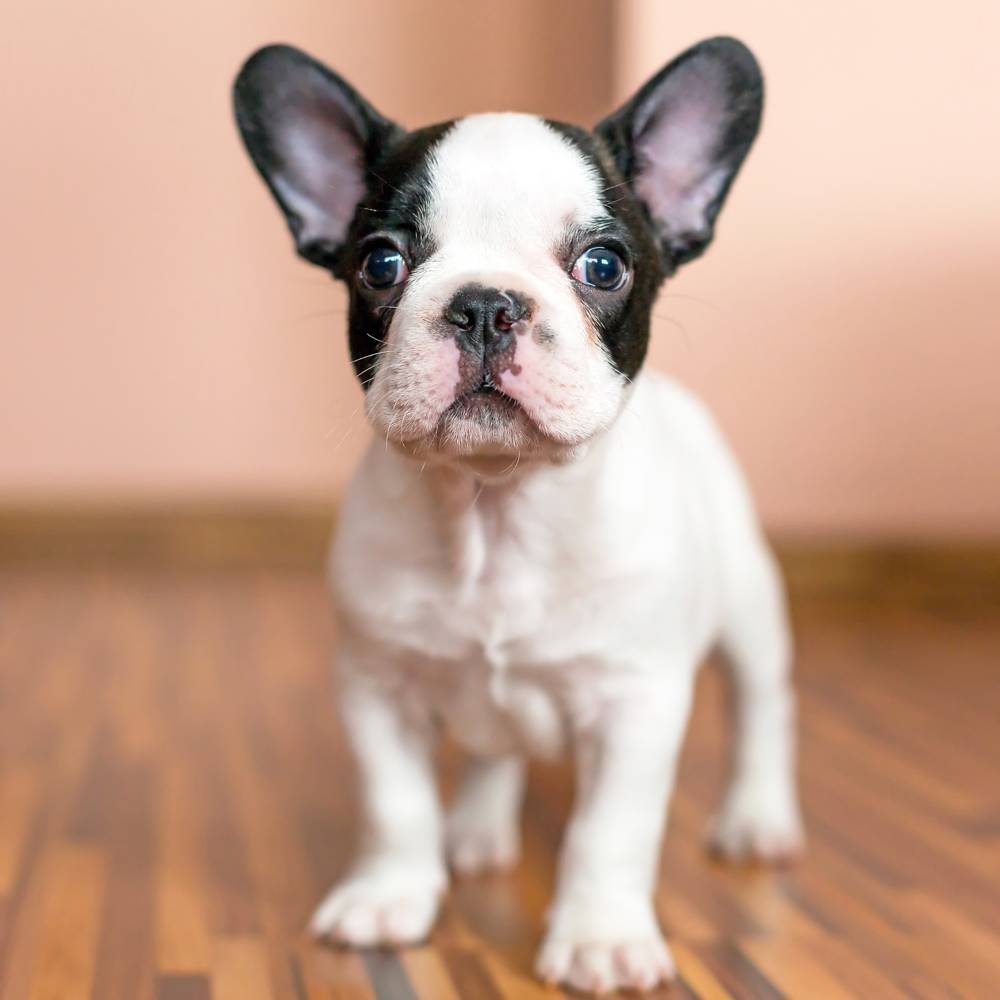

This image is predicted to be a dog, and its breed is: 

Boston_terrier


In [39]:
print(breed_algorithm('test_images/french_bulldog.jpg'))

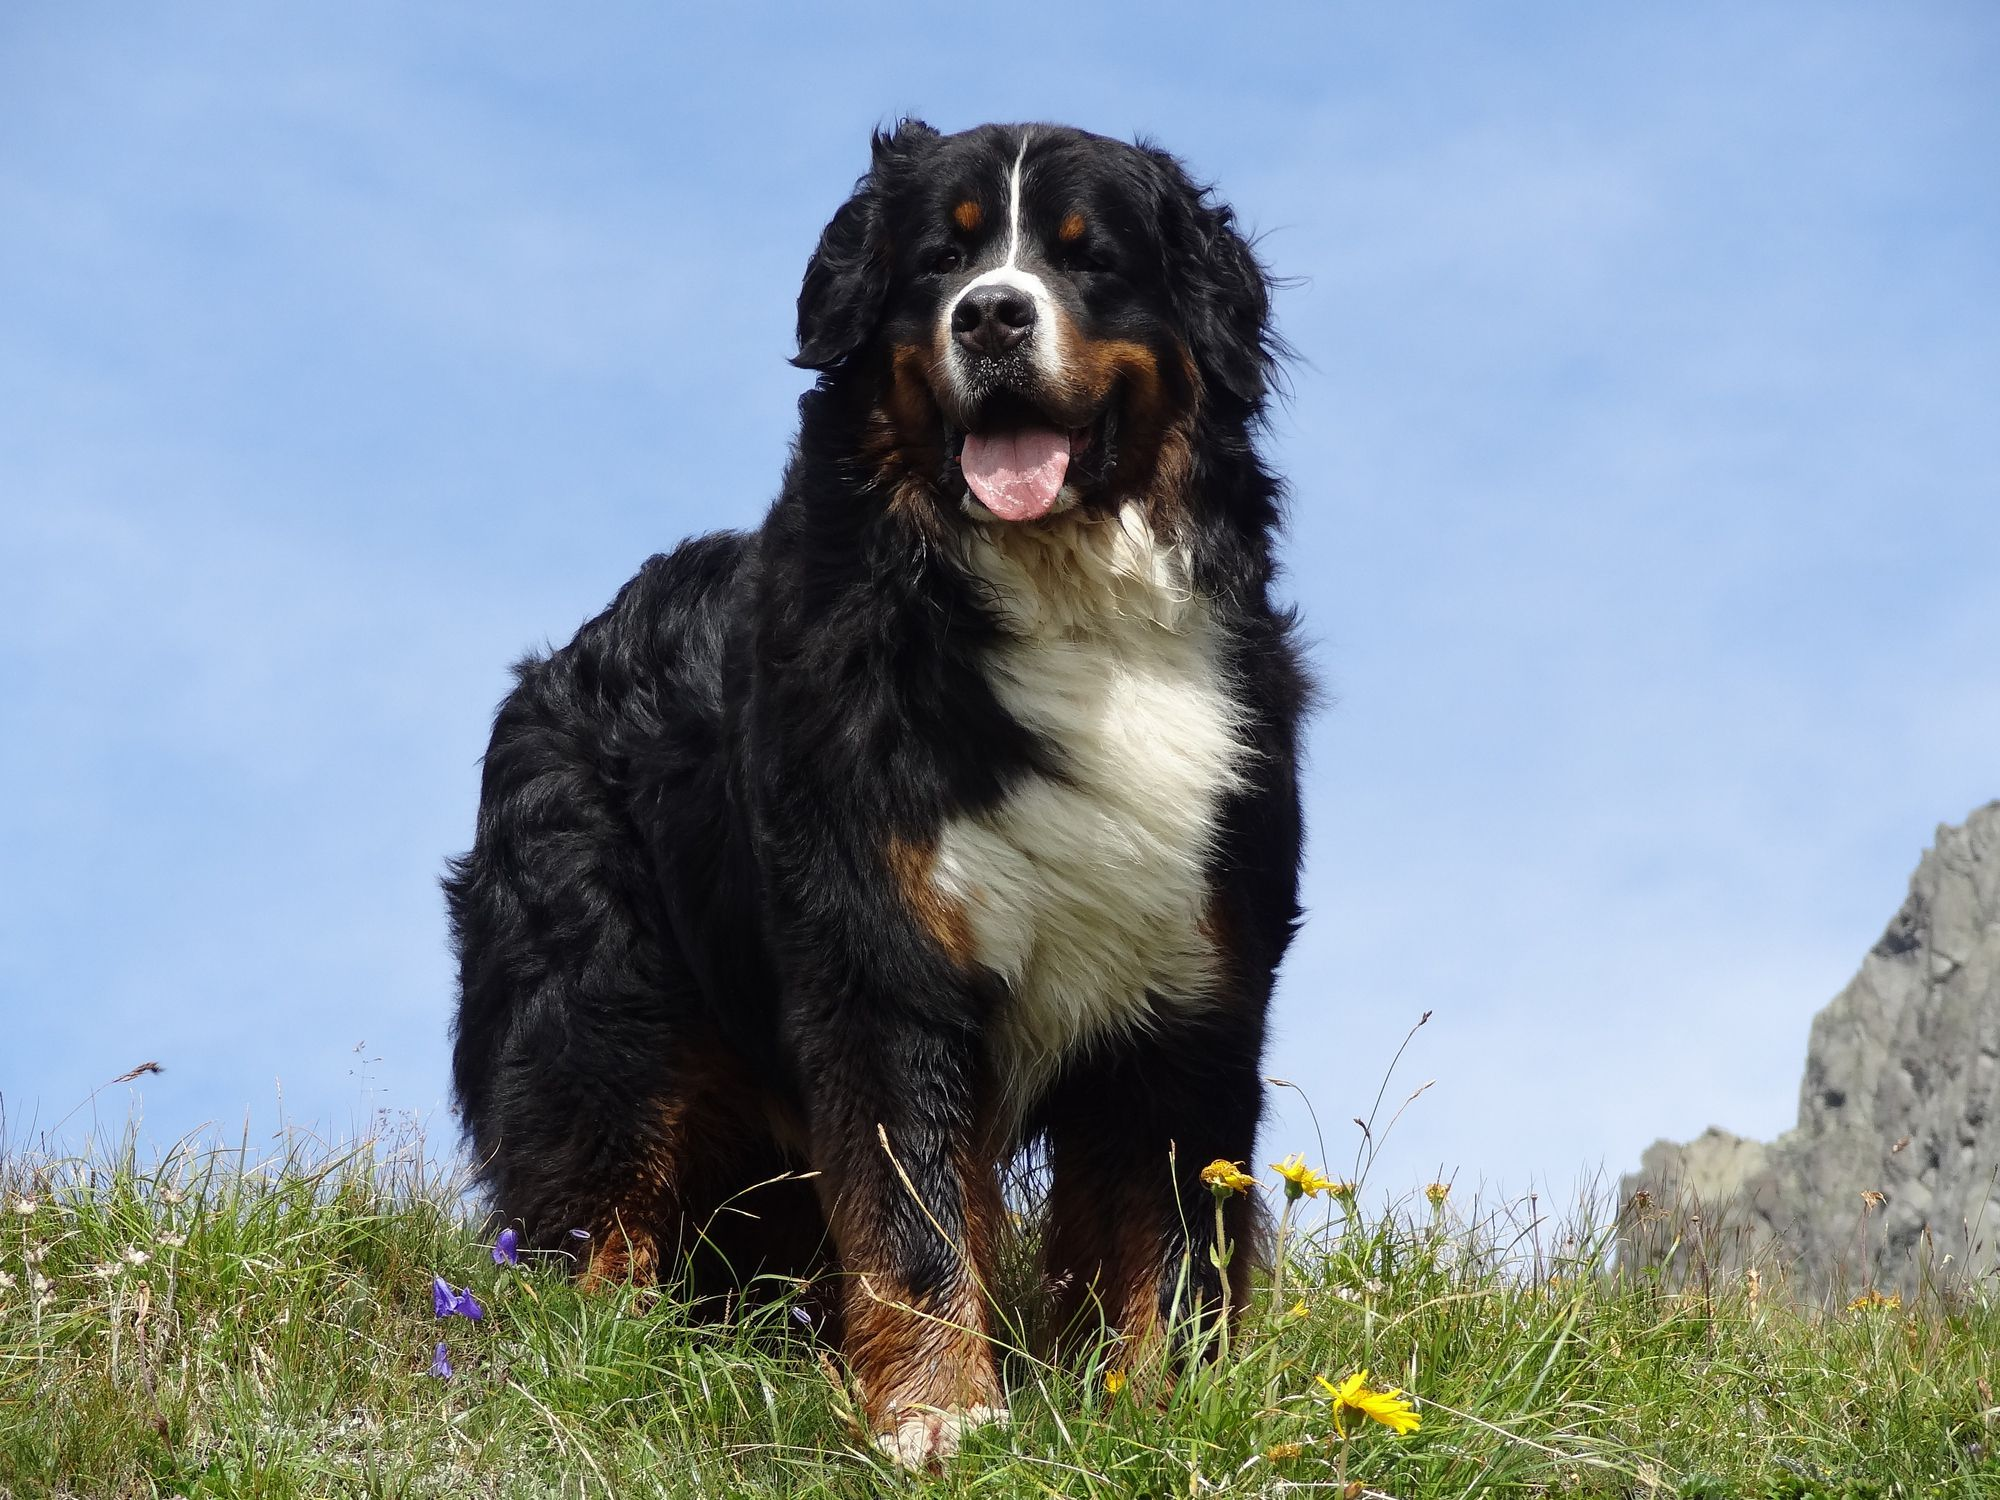

This image is predicted to be a dog, and its breed is: 

Bernese_mountain_dog


In [40]:
print(breed_algorithm('test_images/bernese_mountain.jpg'))

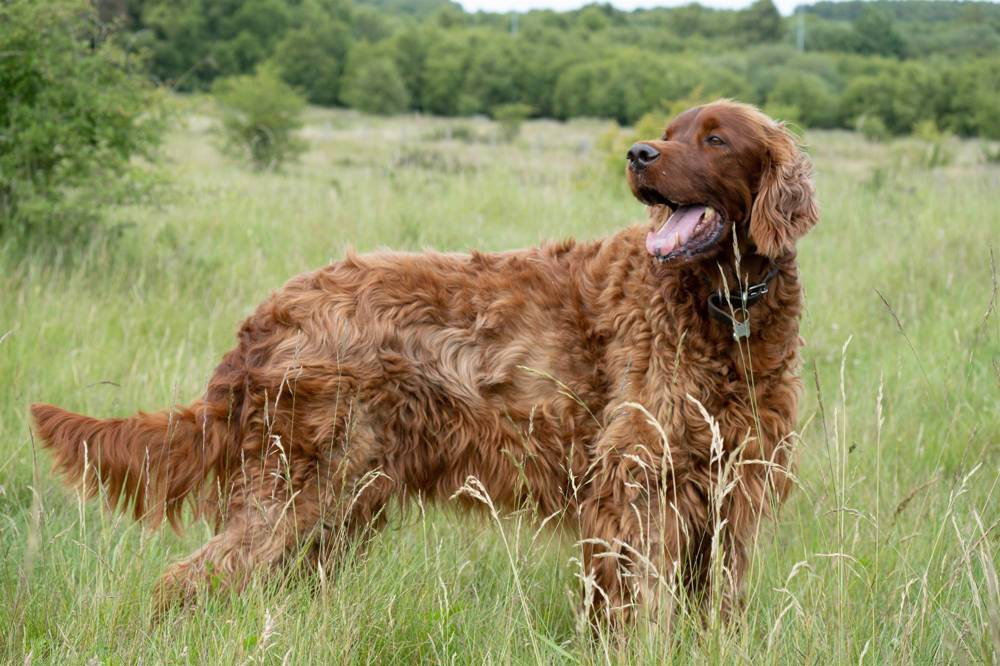

This image is predicted to be a dog, and its breed is: 

Irish_setter


In [41]:
print(breed_algorithm('test_images/irish_setter.jpg'))

### Set of human faces (actually my fav djs)

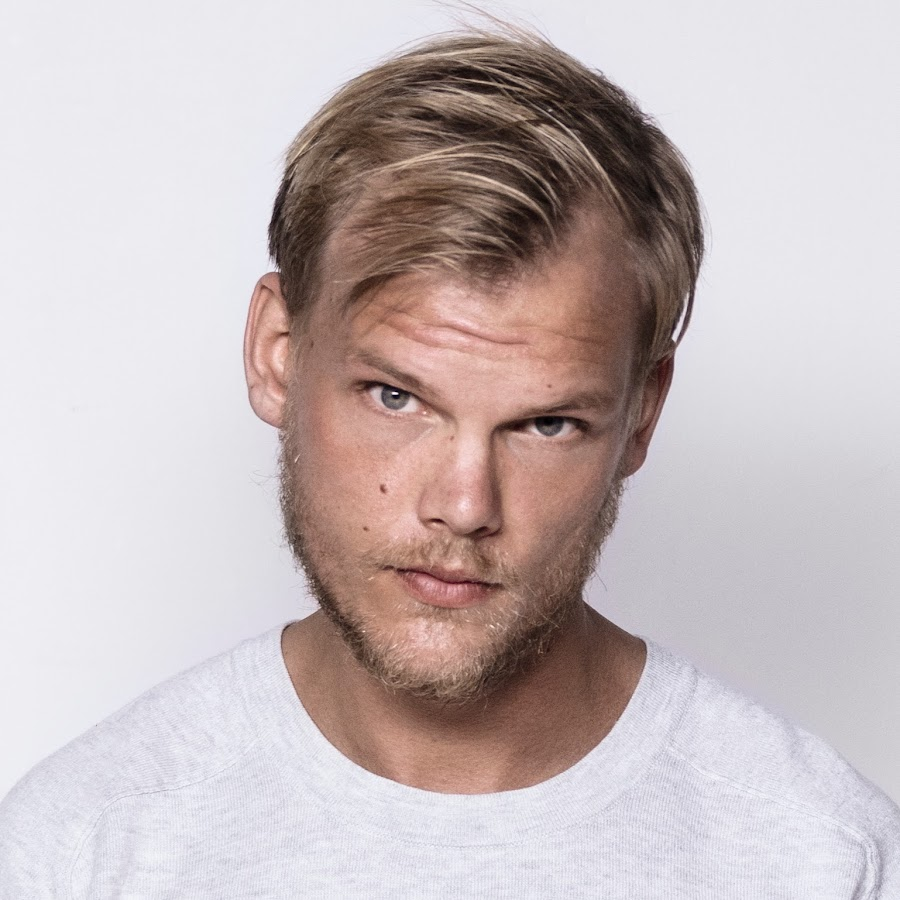

This image is predicted to be a human, and its spirit animal is a: 

Border_collie


In [42]:
print(breed_algorithm('test_images/avicii.jpg'))

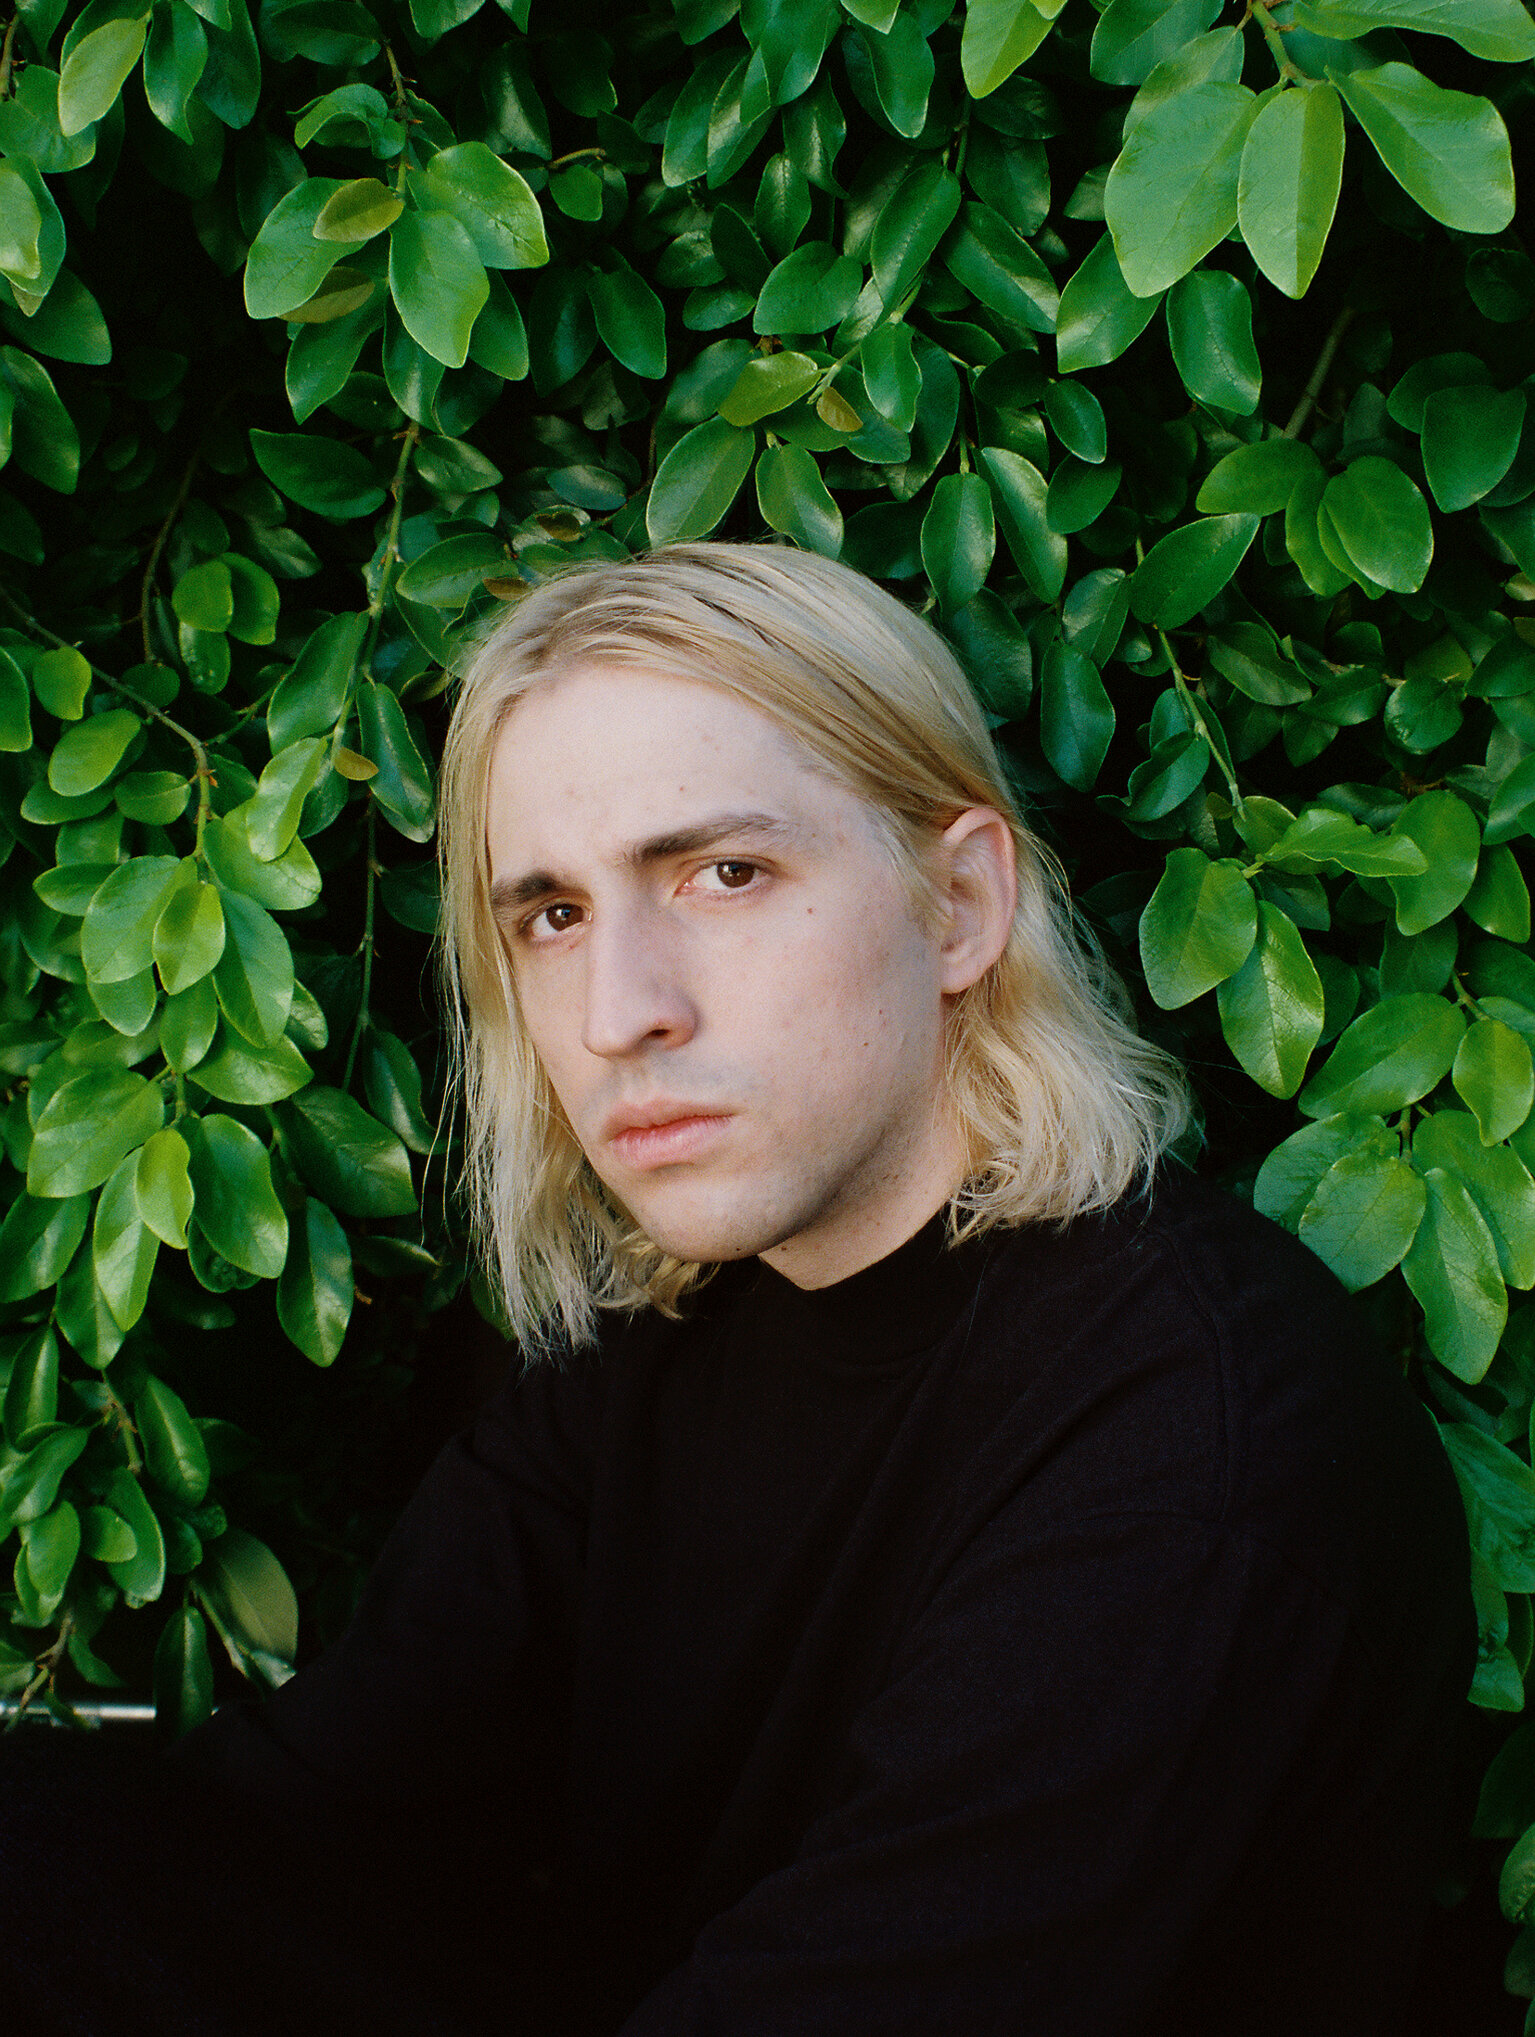

This image is predicted to be a human, and its spirit animal is a: 

Glen_of_imaal_terrier


In [44]:
print(breed_algorithm('test_images/porter.jpg'))

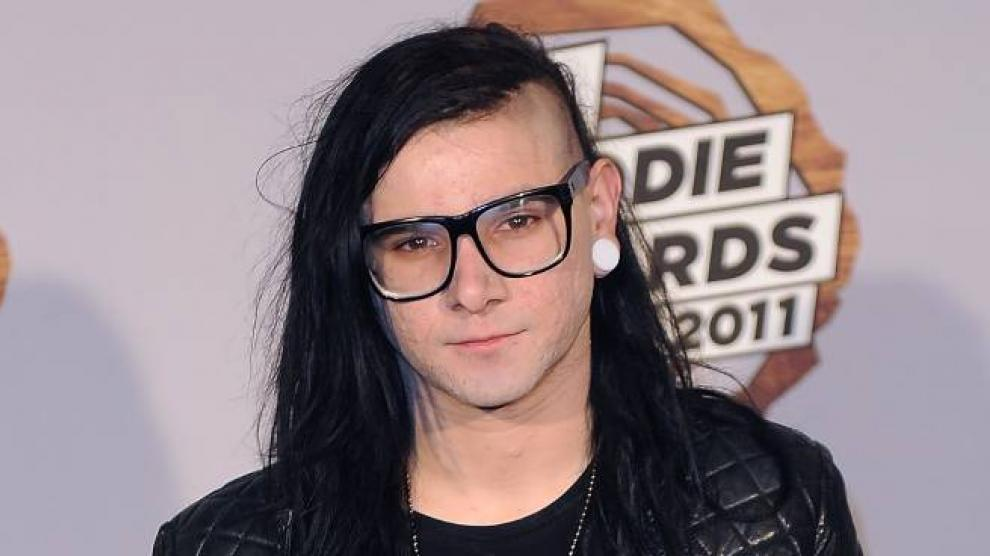

This image is predicted to be a human, and its spirit animal is a: 

Nova_scotia_duck_tolling_retriever


In [45]:
print(breed_algorithm('test_images/skrillex.jpeg'))

### Set of weird pictures

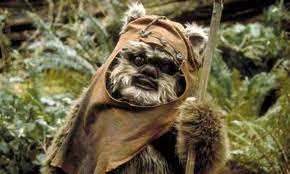

This image is predicted to be a dog, and its breed is: 

Brussels_griffon


In [46]:
print(breed_algorithm('test_images/ewok.jpg'))

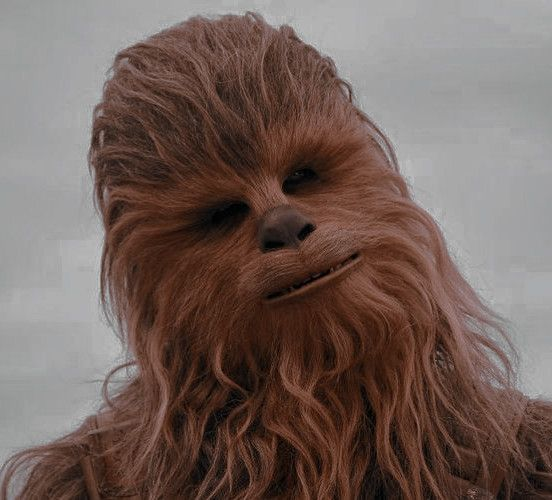

This image is predicted to be a dog, and its breed is: 

Yorkshire_terrier


In [48]:
print(breed_algorithm('test_images/chewbacca.jpg'))

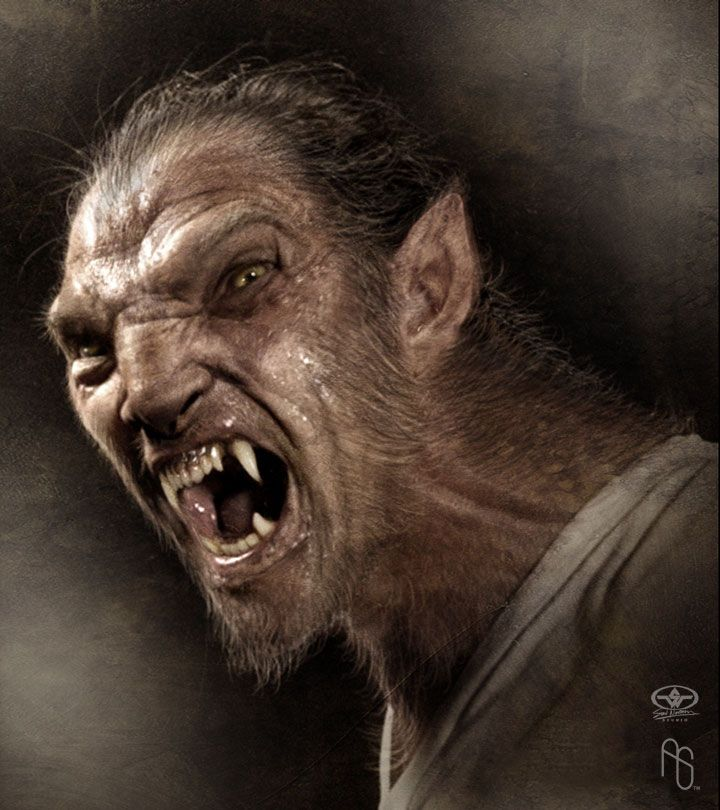

It wasn't possible to identify neither a human face nor a dog in the image 

None


In [49]:
print(breed_algorithm('test_images/werewolf.jpg'))

> It can be observed that the easy recognizable dog breeds were absolutely well identified, while in the hard recognizable brand it got an error in the french bulldog. Nevertheless, the two breeds looks almost identical and the way of differentiating one from another are with really specific features like minimum face length.

> In the human faces set all images were identified correctly as humans and the spirit animals were predicted. I believe the only one that didn't quite well got a good resemblance was the last 'skrillex' image. 

> In the weird pictures set a dog was identified with the ewok and chewbaca, where the dog breeds predicted resembles quite well to the fictional characters. The last picture was selected as it has human and dog characteristics mixed, where neither a dog nor a face was detected! 

#### The algorith created worked really well by identifying the dog breeds and resemblance to human faces, where if it is wanted to have even more precision several things could be done:

1. Use data augmentation techniques to get more features during training. In the specific case of the french bulldog I would propose using image changes that allows to differentiate between the two breeds
2. Add more dense layers to get more high level features and see if this helps
3. Use a more robust pretrained network to get more bottleneck features